In [11]:
import sys
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Check the versions of libraries
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))

#columnNames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
# Describe the dataset
print("\n Statistical Description :-")
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print(dataset.describe())
# share of the dataset
print ("\n The shape of the dataset :-")
print(dataset.shape)
print("\n First 10 records :-")
print(dataset.head(10))
print("\n The datatypes of all columns")
print(dataset.dtypes)
print("\n GroupBy the Outcome :-")
print(dataset.groupby('Outcome').size())


Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
scipy: 1.0.0
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1

 Statistical Description :-
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
count      768.000  768.000        768.000        768.000  768.000  768.000   
mean         3.845  120.895         69.105         20.536   79.799   31.993   
std          3.370   31.973         19.356         15.952  115.244    7.884   
min          0.000    0.000          0.000          0.000    0.000    0.000   
25%          1.000   99.000         62.000          0.000    0.000   27.300   
50%          3.000  117.000         72.000         23.000   30.500   32.000   
75%          6.000  140.250         80.000         32.000  127.250   36.600   
max         17.000  199.000        122.000         99.000  846.000   67.100   

       DiabetesPedigreeFunction      Age  Outcome  
count                   768.000  768.000  76

In [13]:
# Find out the Correlation between the two variables
print("\n Correlation between attributes :-")
print(dataset.corr(method="pearson"))


 Correlation between attributes :-
                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

   

In [15]:
# Print the data distribution which is assumed to be gaussian distribution
# Values closer to zero show less skew.
print("\n The skew (data distribution) :-")
print(dataset.skew())


 The skew (data distribution) :-
Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64


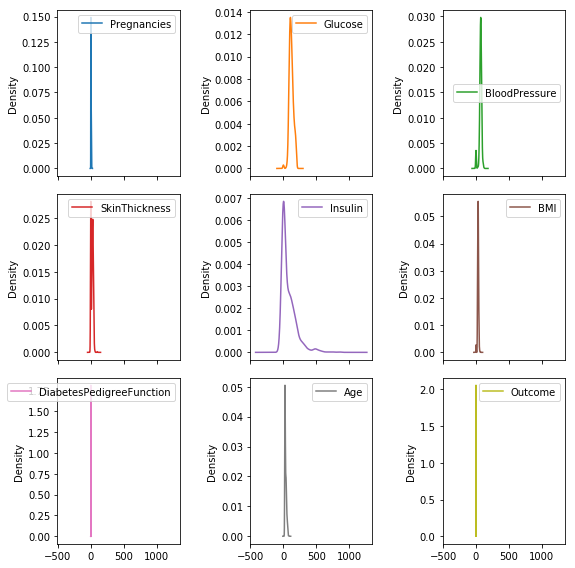

In [34]:
dataset.plot(kind="density",subplots=True, layout=(3,3), figsize=(8,8))
plt.tight_layout()
plt.show()

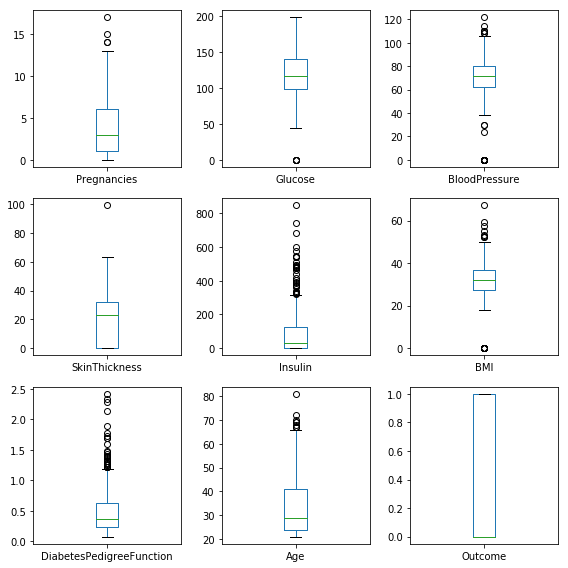

In [36]:
dataset.plot(kind="box",subplots=True, layout=(3,3), figsize=(8,8))
plt.tight_layout()
plt.show()

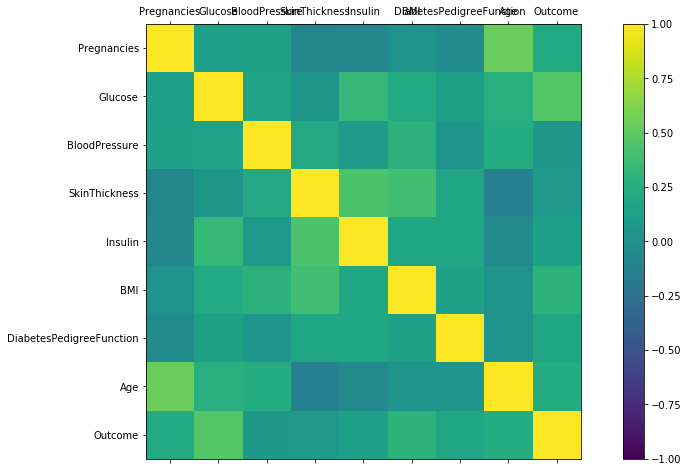

In [50]:
correlations = dataset.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

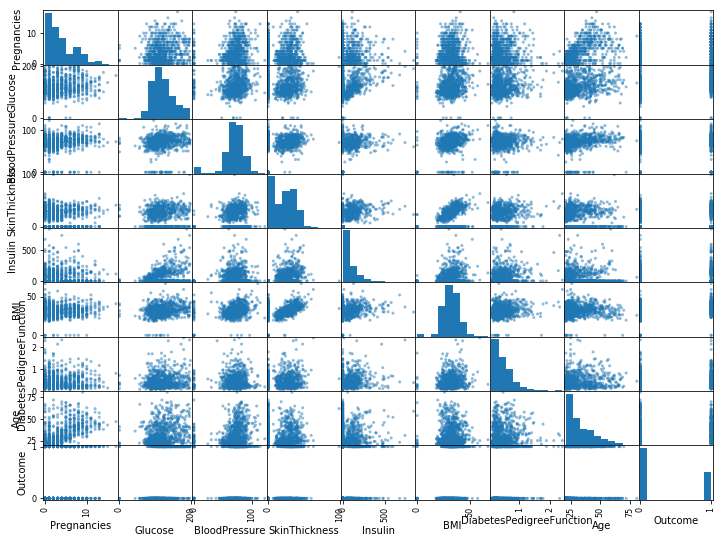

In [56]:
# Displaying a scatter matrix
scatter_matrix(dataset)
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.show()